# INM433 Visual Analytics (PRD1 A 2021/22)
## Individual coursework

# "Technical Stock Analysis with a Fibonacci Approach"

## Data

#### Data source: https://uk.finance.yahoo.com/

* Dataset comprises daily equity stock prices and trading volume for 4 top companies in India listed on the National Stock Exchange of India (NSE).

* Stock tickers: "^NSEI" for Nifty50 market index, "BAJFINANCE.NS" for Bajaj Finance Limited, "HDFCBANK.NS" for HDFC Bank Limited, "INFY.NS" for Infosys Limited, and "NESTLEIND.NS" for Nestle India Limited.

* Nifty50 is a benchmark equity stock market index that represents the equity price performance of top 50 companies in India listed on the NSE.

* Bajaj Finance Limited is a non-banking finance company (NBFC) in India. It is one of the 50 companies constituting the Nifty50 market index. The company is in the business of providing financial products and services and enjoys the top external credit rating of AAA/long-term by CRISIL (S&P Global subsidiary) in India.

* HDFC Bank Limited is one of the largest banks in India. The bank provides products and services in wholesale banking, retail banking and treasury. It is also a part of the Nifty50 market index and enjoys a AAA/long-term rating from CRISIL.

* Infosys Limited is in the business of providing consulting, technology, outsourcing, and digital services in North America, Europe, India and other parts of the world. It is also a part of the Nifty50 index and enjoys the highest credit rating of AAA/long-term from CRISIL.

* Nestle India Limited is in the business of manufacturing and selling food products in India. It provides milk products and nutrition, prepared dishes and cooking aids, powdered and liquid beverages, and confectionery products. It is also a part of the Nifty50 index and enjoys AAA/long-term credit rating from CRISIL.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-colorblind')

In [2]:
# importing the dataset and parse 'Date' column
data = pd.read_csv("Visual_Analytics_Data.csv", parse_dates = ['Date'], dayfirst=True)
# open the pandas table to cover all columns
pd.options.display.max_columns = None
# check the first 5 rows of the dataset
data.head()

,Date,^NSEI Open,^NSEI High,^NSEI Low,^NSEI Close,^NSEI Adj Close,BAJFINANCE.NS Open,BAJFINANCE.NS High,BAJFINANCE.NS Low,BAJFINANCE.NS Close,BAJFINANCE.NS Adj Close,HDFCBANK.NS Open,HDFCBANK.NS High,HDFCBANK.NS Low,HDFCBANK.NS Close,HDFCBANK.NS Adj Close,INFY.NS Open,INFY.NS High,INFY.NS Low,INFY.NS Close,INFY.NS Adj Close,NESTLEIND.NS Open,NESTLEIND.NS High,NESTLEIND.NS Low,NESTLEIND.NS Close,NESTLEIND.NS Adj Close
0,2021-02-15,15270.29981,15340.15039,15243.40039,15314.70020,15314.70020,5605.350098,5799.000000,5600.000000,5779.850098,5770.525879,1600.099976,1625.000000,1596.699951,1616.599976,1609.633423,1320.000000,1328.400024,1307.099976,1309.650024,1284.286621,17349.0,17506.75000,17258.05078,17479.84961,17282.98438
1,2021-02-16,15371.45020,15431.75000,15242.20020,15313.45020,15313.45020,5791.399902,5822.200195,5690.299805,5760.250000,5750.957031,1621.199951,1641.000000,1608.449951,1626.650024,1619.640259,1314.000000,1319.750000,1286.000000,1290.400024,1265.409424,17555.0,17646.00000,17139.09961,17217.25000,17023.34375
2,2021-02-17,15279.90039,15314.29981,15170.75000,15208.90039,15208.90039,5730.000000,5799.000000,5670.000000,5705.149902,5695.945801,1620.000000,1621.800049,1583.000000,1586.500000,1579.663208,1290.400024,1294.500000,1275.000000,1281.300049,1256.485718,16900.0,16900.00000,16350.00000,16741.19922,16552.65234
3,2021-02-18,15238.70020,15250.75000,15078.04981,15118.95020,15118.95020,5699.000000,5714.750000,5522.200195,5563.350098,5554.375000,1605.949951,1605.949951,1548.000000,1554.300049,1547.602051,1276.000000,1306.000000,1275.000000,1292.449951,1267.419678,16756.0,16900.00000,16300.00000,16364.70020,16180.39551
4,2021-02-19,15074.79981,15144.04981,14898.20020,14981.75000,14981.75000,5560.000000,5621.950195,5425.000000,5497.950195,5489.080566,1545.000000,1564.199951,1533.000000,1539.099976,1532.467407,1296.099976,1299.500000,1276.800049,1291.300049,1266.291992,16430.0,16464.69922,16212.95020,16376.40039,16191.96387


The dataset comprises daily open, high, low, closing prices and volume for Nifty50 market index, Bajaj Finance, HDFC Bank, Infosys, and Nestle India for all the trading days of the last one year, i.e., from 15 February 2021 to 15 February 2022.

**Close price are adjusted for splits. Adjusted close prices ('Adj Close') are adjusted for splits and dividend. We will consider 'Adj Close' as closing stock prices for our analysis.

In [3]:
# check the last 5 rows of the dataset
data.tail()

,Date,^NSEI Open,^NSEI High,^NSEI Low,^NSEI Close,^NSEI Adj Close,BAJFINANCE.NS Open,BAJFINANCE.NS High,BAJFINANCE.NS Low,BAJFINANCE.NS Close,BAJFINANCE.NS Adj Close,HDFCBANK.NS Open,HDFCBANK.NS High,HDFCBANK.NS Low,HDFCBANK.NS Close,HDFCBANK.NS Adj Close,INFY.NS Open,INFY.NS High,INFY.NS Low,INFY.NS Close,INFY.NS Adj Close,NESTLEIND.NS Open,NESTLEIND.NS High,NESTLEIND.NS Low,NESTLEIND.NS Close,NESTLEIND.NS Adj Close
244,2022-02-09,17370.09961,17477.15039,17339.00000,17463.80078,17463.80078,7128.549805,7157.899902,7070.000000,7117.350098,7117.350098,1474.00,1499.699951,1467.000000,1497.599976,1497.599976,1735.000000,1743.000000,1725.000000,1737.300049,1737.300049,18090.00,18237.15039,18021.44922,18135.05078,18135.05078
245,2022-02-10,17554.09961,17639.44922,17427.15039,17605.84961,17605.84961,7135.000000,7240.000000,7065.000000,7137.000000,7137.000000,1514.00,1535.500000,1501.650024,1525.099976,1525.099976,1755.650024,1773.900024,1748.750000,1769.599976,1769.599976,18101.00,18212.90039,18010.00000,18139.84961,18139.84961
246,2022-02-11,17451.00000,17454.75000,17303.00000,17374.75000,17374.75000,7040.000000,7079.950195,6921.049805,7011.600098,7011.600098,1500.25,1525.000000,1499.500000,1518.849976,1518.849976,1740.000000,1745.949951,1713.000000,1721.349976,1721.349976,18135.00,18135.00000,17620.00000,17815.19922,17815.19922
247,2022-02-14,17076.15039,17099.50000,16809.65039,16842.80078,16842.80078,6810.000000,6930.000000,6744.049805,6785.950195,6785.950195,1490.00,1499.449951,1469.300049,1473.699951,1473.699951,1690.000000,1718.550049,1678.250000,1682.199951,1682.199951,17716.00,17800.25000,17429.80078,17670.25000,17670.25000
248,2022-02-15,16933.25000,17375.00000,16839.25000,17352.44922,17352.44922,6800.000000,7195.000000,6785.950195,7142.049805,7142.049805,1476.00,1524.900024,1473.050049,1517.800049,1517.800049,1699.000000,1746.750000,1690.449951,1738.250000,1738.250000,17670.25,18323.25000,17571.44922,18187.09961,18187.09961


In [4]:
# check the data shape
data.shape

(249, 26)

The dataset has 249 rows (for 249 trading days) and 26 columns (for daily prices + date column).

In [5]:
# check the data types for all the columns and if there are any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     249 non-null    datetime64[ns]
 1   ^NSEI Open               249 non-null    float64       
 2   ^NSEI High               249 non-null    float64       
 3   ^NSEI Low                249 non-null    float64       
 4   ^NSEI Close              249 non-null    float64       
 5   ^NSEI Adj Close          249 non-null    float64       
 6   BAJFINANCE.NS Open       249 non-null    float64       
 7   BAJFINANCE.NS High       249 non-null    float64       
 8   BAJFINANCE.NS Low        249 non-null    float64       
 9   BAJFINANCE.NS Close      249 non-null    float64       
 10  BAJFINANCE.NS Adj Close  249 non-null    float64       
 11  HDFCBANK.NS Open         249 non-null    float64       
 12  HDFCBANK.NS High         249 non-nul

There are no missing values and the numerical data appears to be in the required data type. However, it can be seen that the 'Date' column needs to be set as index.

In [6]:
# Set 'Date' as index for this data frame
data.set_index('Date', inplace = True)
data.index

DatetimeIndex(['2021-02-15', '2021-02-16', '2021-02-17', '2021-02-18',
               '2021-02-19', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26',
               ...
               '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-07',
               '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11',
               '2022-02-14', '2022-02-15'],
              dtype='datetime64[ns]', name='Date', length=249, freq=None)

In [7]:
# check the dataset last 5 rows
data.tail()

,^NSEI Open,^NSEI High,^NSEI Low,^NSEI Close,^NSEI Adj Close,BAJFINANCE.NS Open,BAJFINANCE.NS High,BAJFINANCE.NS Low,BAJFINANCE.NS Close,BAJFINANCE.NS Adj Close,HDFCBANK.NS Open,HDFCBANK.NS High,HDFCBANK.NS Low,HDFCBANK.NS Close,HDFCBANK.NS Adj Close,INFY.NS Open,INFY.NS High,INFY.NS Low,INFY.NS Close,INFY.NS Adj Close,NESTLEIND.NS Open,NESTLEIND.NS High,NESTLEIND.NS Low,NESTLEIND.NS Close,NESTLEIND.NS Adj Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-09,17370.09961,17477.15039,17339.00000,17463.80078,17463.80078,7128.549805,7157.899902,7070.000000,7117.350098,7117.350098,1474.00,1499.699951,1467.000000,1497.599976,1497.599976,1735.000000,1743.000000,1725.000000,1737.300049,1737.300049,18090.00,18237.15039,18021.44922,18135.05078,18135.05078
2022-02-10,17554.09961,17639.44922,17427.15039,17605.84961,17605.84961,7135.000000,7240.000000,7065.000000,7137.000000,7137.000000,1514.00,1535.500000,1501.650024,1525.099976,1525.099976,1755.650024,1773.900024,1748.750000,1769.599976,1769.599976,18101.00,18212.90039,18010.00000,18139.84961,18139.84961
2022-02-11,17451.00000,17454.75000,17303.00000,17374.75000,17374.75000,7040.000000,7079.950195,6921.049805,7011.600098,7011.600098,1500.25,1525.000000,1499.500000,1518.849976,1518.849976,1740.000000,1745.949951,1713.000000,1721.349976,1721.349976,18135.00,18135.00000,17620.00000,17815.19922,17815.19922
2022-02-14,17076.15039,17099.50000,16809.65039,16842.80078,16842.80078,6810.000000,6930.000000,6744.049805,6785.950195,6785.950195,1490.00,1499.449951,1469.300049,1473.699951,1473.699951,1690.000000,1718.550049,1678.250000,1682.199951,1682.199951,17716.00,17800.25000,17429.80078,17670.25000,17670.25000
2022-02-15,16933.25000,17375.00000,16839.25000,17352.44922,17352.44922,6800.000000,7195.000000,6785.950195,7142.049805,7142.049805,1476.00,1524.900024,1473.050049,1517.800049,1517.800049,1699.000000,1746.750000,1690.449951,1738.250000,1738.250000,17670.25,18323.25000,17571.44922,18187.09961,18187.09961


## Analysis

### Price movements

In [8]:
# define a function to plot closing prices with moving average prices for visualisation

def price_chart(ticker):
    
    # Calculate exponential moving averages for 50 days and 125 days
    EMA_50days = data[str(ticker+' '+'Adj Close')].ewm(span = 50).mean()
    EMA_125days = data[str(ticker+' '+'Adj Close')].ewm(span = 125).mean()
    
    # Plotting the EMAs and closing price on the chart
    plt.figure(figsize = (12,6))
    plt.plot(data[str(ticker+' '+'Adj Close')], label = 'Closing Price', color = 'black')
    plt.plot(EMA_50days, label = '50-day Short Average (EMA)', color = 'darkorange')
    plt.plot(EMA_125days, label = '125-day Long Average (EMA)', color = 'darkgreen')
    plt.title('CLOSING PRICE FOR %s' % ticker, fontsize = 16)
    plt.ylabel('Price in INR')
    plt.legend(fontsize = 14)
    plt.grid(which = "major", color = 'k', linestyle = '-.', linewidth = 0.5)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show();
    
    end_date = data.index[-1].strftime('%d-%m-%Y')
    start_date = data.index[0].strftime('%d-%m-%Y')
    print('\n')
    print('Prices related information:')
    print('\n')
    print('    Closing price as on {date} = '.format(date = end_date) + str(int(round(data[str(ticker+' '+'Adj Close')][-1]))))
    print('    Closing price as on {date} = '.format(date = start_date) + str(int(round(data[str(ticker+' '+'Adj Close')][0]))))
    print('    50-day EMA price as on {date} = '.format(date = end_date) + str(int(EMA_50days[-1])))
    print('    125-day EMA price as on {date} = '.format(date = end_date) + str(int(EMA_125days[-1])))
    print('    52-Week HIGH price = ' + str(int(round(data[str(ticker+' '+'High')].max()))))
    print('    52-Week LOW price = ' + str(int(round(data[str(ticker+' '+'Low')].min()))))
    print('\n')
    print('\n')

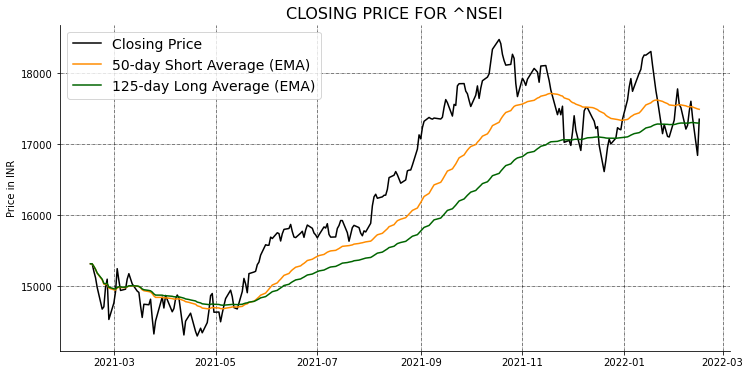



Prices related information:


    Closing price as on 15-02-2022 = 17352
    Closing price as on 15-02-2021 = 15315
    50-day EMA price as on 15-02-2022 = 17492
    125-day EMA price as on 15-02-2022 = 17299
    52-Week HIGH price = 18604
    52-Week LOW price = 14151






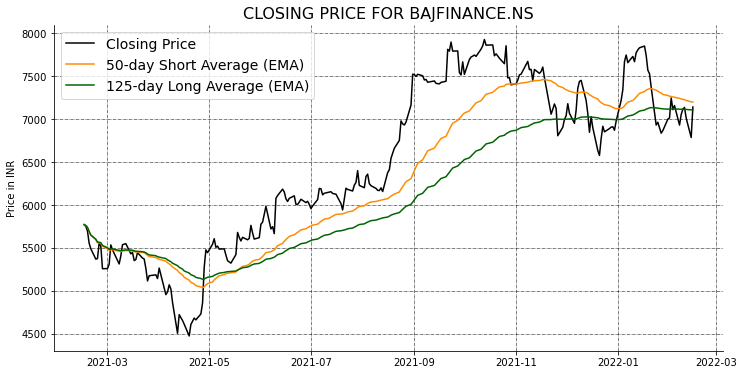



Prices related information:


    Closing price as on 15-02-2022 = 7142
    Closing price as on 15-02-2021 = 5771
    50-day EMA price as on 15-02-2022 = 7199
    125-day EMA price as on 15-02-2022 = 7108
    52-Week HIGH price = 8050
    52-Week LOW price = 4362






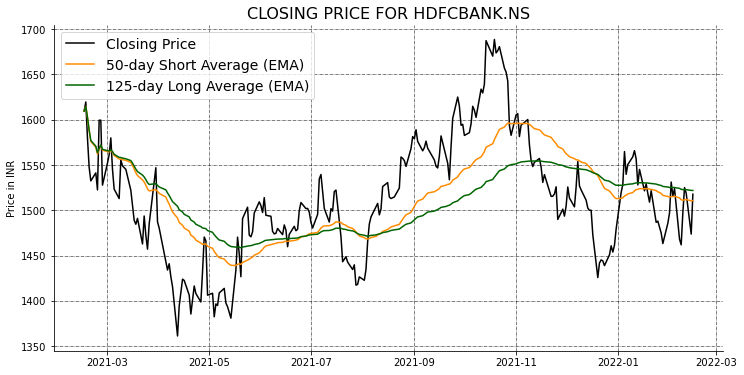



Prices related information:


    Closing price as on 15-02-2022 = 1518
    Closing price as on 15-02-2021 = 1610
    50-day EMA price as on 15-02-2022 = 1510
    125-day EMA price as on 15-02-2022 = 1521
    52-Week HIGH price = 1725
    52-Week LOW price = 1353






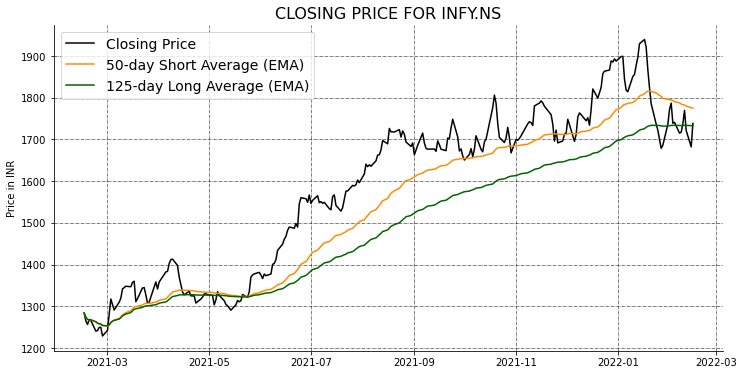



Prices related information:


    Closing price as on 15-02-2022 = 1738
    Closing price as on 15-02-2021 = 1284
    50-day EMA price as on 15-02-2022 = 1774
    125-day EMA price as on 15-02-2022 = 1732
    52-Week HIGH price = 1954
    52-Week LOW price = 1245






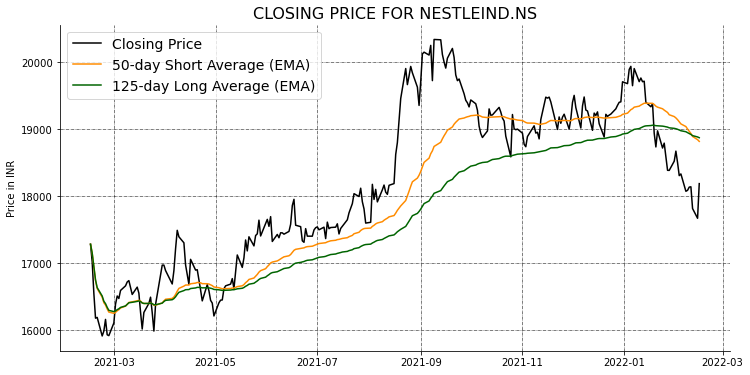



Prices related information:


    Closing price as on 15-02-2022 = 18187
    Closing price as on 15-02-2021 = 17283
    50-day EMA price as on 15-02-2022 = 18817
    125-day EMA price as on 15-02-2022 = 18871
    52-Week HIGH price = 20609
    52-Week LOW price = 16002






In [9]:
# plot the closing prices and moving averages on chart for NSE index and all the stocks
tickers = ['^NSEI', 'BAJFINANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'NESTLEIND.NS']
for ticker in tickers:
    price_chart(ticker)

In [10]:
# descriptive statistics for all the stocks
for ticker in tickers:
    print(data[str(ticker + ' ' + 'Adj Close')].describe())
    print('\n')

count      249.000000
mean     16412.463017
std       1240.078838
min      14296.400390
25%      15208.900390
50%      16529.099610
75%      17532.050780
max      18477.050780
Name: ^NSEI Adj Close, dtype: float64


count     249.000000
mean     6497.070997
std       943.428199
min      4472.373535
25%      5622.115723
50%      6410.100098
75%      7430.649902
max      7929.299805
Name: BAJFINANCE.NS Adj Close, dtype: float64


count     249.000000
mean     1513.025480
std        64.505284
min      1361.158936
25%      1473.074463
50%      1509.317627
75%      1553.800049
max      1688.699951
Name: HDFCBANK.NS Adj Close, dtype: float64


count     249.000000
mean     1582.450931
std       193.981147
min      1229.027954
25%      1373.477783
50%      1663.011719
75%      1726.350464
max      1939.500000
Name: INFY.NS Adj Close, dtype: float64


count      249.000000
mean     18192.754624
std       1207.381471
min      15915.017580
25%      17324.269530
50%      18135.050780
75%      192

In order to compare the relative price movements for the market index and the 4 stocks, it may be better to normalise the data over a starting scale of 100.

Normalisation to 100:

$$
\frac {P_t}{P_0} * 100
$$

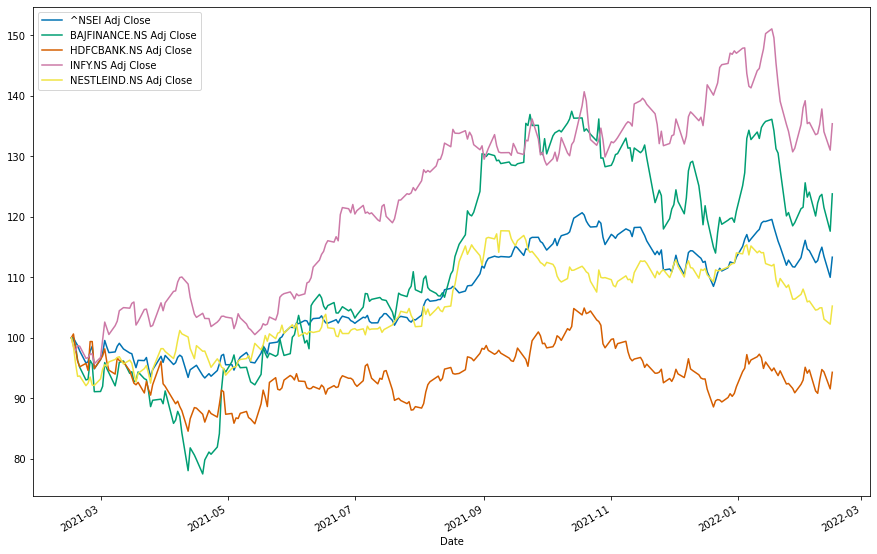

In [11]:
data_for_nor = data[['^NSEI Adj Close', 'BAJFINANCE.NS Adj Close', 
                     'HDFCBANK.NS Adj Close', 'INFY.NS Adj Close', 
                     'NESTLEIND.NS Adj Close']]

(data_for_nor / data_for_nor.iloc[0] * 100).plot(figsize = (15, 10))
plt.show();

It can be seen that over the last one year, Nestle India and HDFC Bank have underperformed the market index, whereas Bajaj Finance and Infosys have outperformed the market index.

### Returns on market index and stocks

In [12]:
# prepare dataframe for daily log returns from the market index and all the stocks
for ticker in tickers:
    data[str(ticker+' '+'log returns')] = np.log(data[str(ticker+' '+'Adj Close')] / 
                                                 data[str(ticker+' '+'Adj Close')].shift(1))

data.head()

,^NSEI Open,^NSEI High,^NSEI Low,^NSEI Close,^NSEI Adj Close,BAJFINANCE.NS Open,BAJFINANCE.NS High,BAJFINANCE.NS Low,BAJFINANCE.NS Close,BAJFINANCE.NS Adj Close,HDFCBANK.NS Open,HDFCBANK.NS High,HDFCBANK.NS Low,HDFCBANK.NS Close,HDFCBANK.NS Adj Close,INFY.NS Open,INFY.NS High,INFY.NS Low,INFY.NS Close,INFY.NS Adj Close,NESTLEIND.NS Open,NESTLEIND.NS High,NESTLEIND.NS Low,NESTLEIND.NS Close,NESTLEIND.NS Adj Close,^NSEI log returns,BAJFINANCE.NS log returns,HDFCBANK.NS log returns,INFY.NS log returns,NESTLEIND.NS log returns
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-15,15270.29981,15340.15039,15243.40039,15314.70020,15314.70020,5605.350098,5799.000000,5600.000000,5779.850098,5770.525879,1600.099976,1625.000000,1596.699951,1616.599976,1609.633423,1320.000000,1328.400024,1307.099976,1309.650024,1284.286621,17349.0,17506.75000,17258.05078,17479.84961,17282.98438,NaN,NaN,NaN,NaN,NaN
2021-02-16,15371.45020,15431.75000,15242.20020,15313.45020,15313.45020,5791.399902,5822.200195,5690.299805,5760.250000,5750.957031,1621.199951,1641.000000,1608.449951,1626.650024,1619.640259,1314.000000,1319.750000,1286.000000,1290.400024,1265.409424,17555.0,17646.00000,17139.09961,17217.25000,17023.34375,-0.000082,-0.003397,0.006198,-0.014808,-0.015137
2021-02-17,15279.90039,15314.29981,15170.75000,15208.90039,15208.90039,5730.000000,5799.000000,5670.000000,5705.149902,5695.945801,1620.000000,1621.800049,1583.000000,1586.500000,1579.663208,1290.400024,1294.500000,1275.000000,1281.300049,1256.485718,16900.0,16900.00000,16350.00000,16741.19922,16552.65234,-0.006851,-0.009612,-0.024992,-0.007077,-0.028039
2021-02-18,15238.70020,15250.75000,15078.04981,15118.95020,15118.95020,5699.000000,5714.750000,5522.200195,5563.350098,5554.375000,1605.949951,1605.949951,1548.000000,1554.300049,1547.602051,1276.000000,1306.000000,1275.000000,1292.449951,1267.419678,16756.0,16900.00000,16300.00000,16364.70020,16180.39551,-0.005932,-0.025169,-0.020505,0.008664,-0.022746
2021-02-19,15074.79981,15144.04981,14898.20020,14981.75000,14981.75000,5560.000000,5621.950195,5425.000000,5497.950195,5489.080566,1545.000000,1564.199951,1533.000000,1539.099976,1532.467407,1296.099976,1299.500000,1276.800049,1291.300049,1266.291992,16430.0,16464.69922,16212.95020,16376.40039,16191.96387,-0.009116,-0.011825,-0.009828,-0.000890,0.000715


In [13]:
returns_df = data[['^NSEI log returns', 'BAJFINANCE.NS log returns', 'HDFCBANK.NS log returns',
                   'INFY.NS log returns', 'NESTLEIND.NS log returns']][1:]
returns_df

,^NSEI log returns,BAJFINANCE.NS log returns,HDFCBANK.NS log returns,INFY.NS log returns,NESTLEIND.NS log returns
Date,,,,,
2021-02-16,-0.000082,-0.003397,0.006198,-0.014808,-0.015137
2021-02-17,-0.006851,-0.009612,-0.024992,-0.007077,-0.028039
2021-02-18,-0.005932,-0.025169,-0.020505,0.008664,-0.022746
2021-02-19,-0.009116,-0.011825,-0.009828,-0.000890,0.000715
2021-02-22,-0.020640,-0.022273,0.005766,-0.020419,-0.017252
...,...,...,...,...,...
2022-02-09,0.011348,0.008799,0.024161,0.011579,0.002645
2022-02-10,0.008101,0.002757,0.018196,0.018421,0.000265
2022-02-11,-0.013213,-0.017727,-0.004107,-0.027645,-0.018059


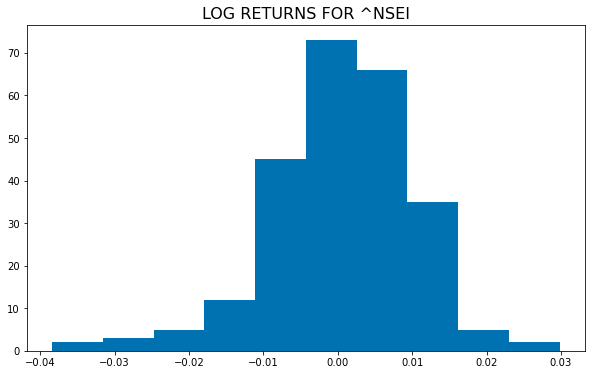

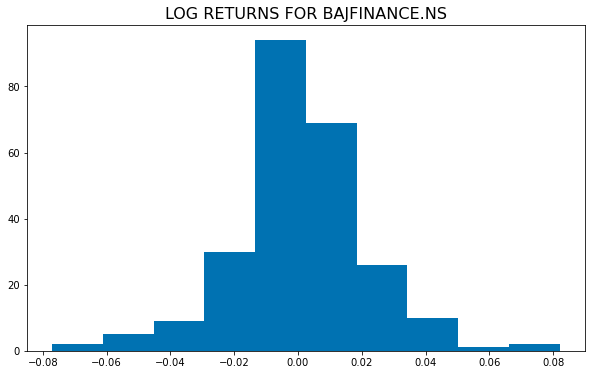

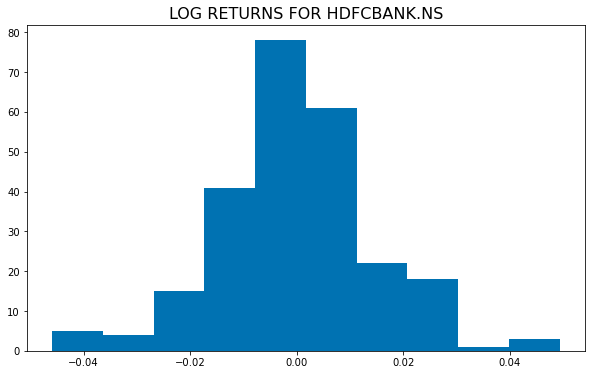

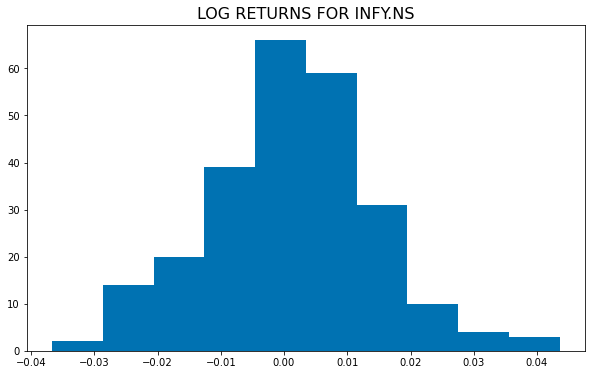

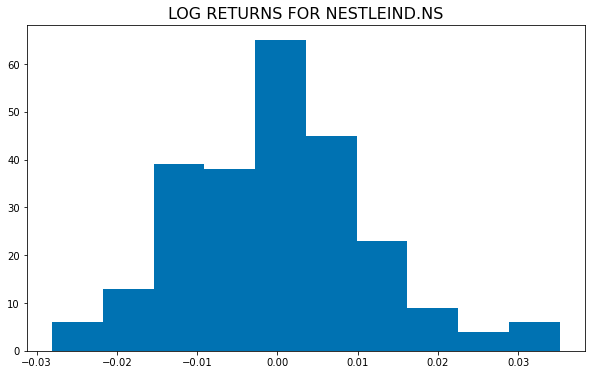

In [14]:
# plot the distribution of all the daily log returns
for ticker in tickers:
    print('\n')
    plt.figure(figsize=(10,6))
    plt.hist(returns_df[str(ticker+' '+'log returns')])
    plt.title('LOG RETURNS FOR {t}'.format(t=ticker), fontsize=16)
    plt.show;

In [15]:
# calculate the mean log returns for the market index and all the stocks
for ticker in tickers:
    print('Average log returns for {t}:'.format(t=ticker), 
          round(returns_df[str(ticker+' '+'log returns')].mean() * returns_df.shape[0]
                * 100, 2), '%'
         )

Average log returns for ^NSEI: 12.49 %
Average log returns for BAJFINANCE.NS: 21.32 %
Average log returns for HDFCBANK.NS: -5.87 %
Average log returns for INFY.NS: 30.27 %
Average log returns for NESTLEIND.NS: 5.1 %


The above provides numerical values for the underperformance of Nestle India and HDFC Bank and overperformance of Bajaj Finance and Infosys, in relation to the market index (as had observed in the normalisation chart above).

In [16]:
# correlation of individual stock returns to market index returns
returns_df.corr()['^NSEI log returns']

^NSEI log returns            1.000000
BAJFINANCE.NS log returns    0.676922
HDFCBANK.NS log returns      0.732580
INFY.NS log returns          0.576922
NESTLEIND.NS log returns     0.369016
Name: ^NSEI log returns, dtype: float64

Interestingly, HDFC Bank has given a negative return of -5.9% over the last one year when the market return was positive 12.5% during the same time period. This is despite HDFC Bank returns are 73% correlated to market returns.

The above returns are assuming that one is holding onto the market index security or the 4 stocks being analysed. However, in practice traders try to sell stocks at a higher price than the buying price to realise the gains from stock trading. Therefore, it is required to analyse the average log returns generated from highest closing price and lowest closing price over different periods in time, e.g., in 4 quarterly intervals during the year.

In [17]:
# Break HDFC Bank 'Adj Close' prices in 4 dataframes of quarterly intervals each
HDFC_Q1 = data['HDFCBANK.NS Adj Close'].loc['2021-02-15':'2021-05-14']
HDFC_Q2 = data['HDFCBANK.NS Adj Close'].loc['2021-05-15':'2021-08-14']
HDFC_Q3 = data['HDFCBANK.NS Adj Close'].loc['2021-08-15':'2021-11-14']
HDFC_Q4 = data['HDFCBANK.NS Adj Close'].loc['2021-11-15':'2022-02-15']

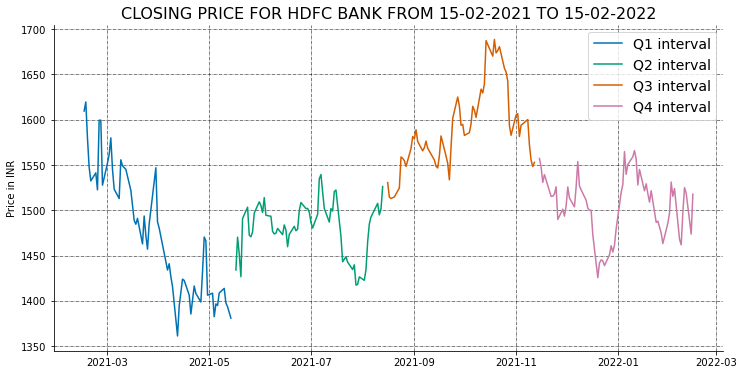

In [18]:
# Plot HDFC Bank's prices across four quarters in the chart
plt.figure(figsize = (12,6))
plt.plot(HDFC_Q1, label = 'Q1 interval')
plt.plot(HDFC_Q2, label = 'Q2 interval')
plt.plot(HDFC_Q3, label = 'Q3 interval')
plt.plot(HDFC_Q4, label = 'Q4 interval')
plt.title('CLOSING PRICE FOR HDFC BANK FROM 15-02-2021 TO 15-02-2022', fontsize = 16)
plt.ylabel('Price in INR')
plt.legend(fontsize = 14)
plt.grid(which = "major", color = 'k', linestyle = '-.', linewidth = 0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [19]:
# Finding HDFC Bank's highest closing price, lowest closing price and maximum returns for each quarter interval

# List of maximum High prices for each interval
highs = [round(HDFC_Q1.max()), 
         round(HDFC_Q2.max()), 
         round(HDFC_Q3.max()), 
         round(HDFC_Q4.max())]

# List of minimum Low prices for each interval
lows = [round(HDFC_Q1.min()), 
        round(HDFC_Q2.min()),
        round(HDFC_Q3.min()),
        round(HDFC_Q4.min())]

highs_lows = list(zip(highs, lows))

# List of maximum log returns in each interval as a percent
max_returns = []
for x, y in highs_lows:
    gain = x - y
    percent_gain = round(gain / y * 100, 2)
    max_returns.append(percent_gain)
max_returns

[19.03, 8.68, 11.63, 9.82]

In [20]:
summary = pd.DataFrame(columns=['Intervals', 'Highest close', 'Lowest close', '% gain'])
summary['Intervals'] = ['Q1', 'Q2', 'Q3', 'Q4']
summary['Highest close'] = highs
summary['Lowest close'] = lows
summary['% gain'] = max_returns
summary.set_index('Intervals', inplace=True)
summary

,Highest close,Lowest close,% gain
Intervals,,,
Q1,1620,1361,19.03
Q2,1540,1417,8.68
Q3,1689,1513,11.63
Q4,1566,1426,9.82


In [21]:
print("The average gain for HDFC Bank arising from the difference between the highest closing price and lowest closing price during each interval of four quarters is {g}%".format(g=round(summary['% gain'].mean(),1)))

The average gain for HDFC Bank arising from the difference between the highest closing price and lowest closing price during each interval of four quarters is 12.3%


It can be seen that if the trader would have bought HDFC Bank stock at the beginning of the year and sold it at the end of the year in review, the trader would have made a loss of -5.87%.

However, if the trader would have bought and sold HDFC Bank stock during each quarter at the minimum price and maximum price respectively in the quarter, the trader would have made an average gain of 12.3% for the year.

One may argue that we may not be able to sell stock before buying it, i.e. what if the maximum price preceeds the minimum price during the quarter, as can be seen in Q1 and Q2 above. For such cases, one can always access the derivatives market, which is based on margin trading for the same stock. In which case, the stock could be sold first and bought later in the derivatives market.

Therefore, it is important to estimate the maximum and minimum price points in stock trading to maximise the returns. In practice, traders buy and sell stock on a daily basis based on their expert judgement of maximum and minimum stock prices.

#### In order to estimate maximum and minimum prices, stock traders use a number of tools to try and reasonably estimate the retracement levels in stock prices, i.e., at what price will a stock price turn direction, e.g., if a stock price is moving up, at what price point will it turn downward, and similarly if the stock price is falling, at what price will it turn moving upward.

#### Stock traders would like to estimate retracement price levels with a certain level of confidence or probability. 

If the trader is able to sell stocks at the high price points and buy stocks at the low price points, they stand to make larger gains than the returns made from only holding onto a stock over a time period.

### Fibonacci approach to find retracement price levels

Refer chapter 7 page 137 on 'Fibonacci Price Projections' from the book "Breakthrough Strategies For Predicting Any Market" by Jeff Greenblatt (second edition published in 2013). This chapter explains how retracement price levels are estimated to build support and resistance levels for a stock price using a Fibonacci approach.

Further, the Financial Innovation research paper on "Energy crypto currencies and leading U.S. energy stock prices: are Fibonacci retracements profitable?" by Ikhlaas Gurrib, Mohammad Nourani and Rajesh Kumar Bhaskaran published in January 2022 explains the history and calculations behind the Finonacci retracements.

Based on these studies, the following retracement levels have been established:
* 23.6%
* 38.2%
* 50.0%
* 61.8%
* 78.6%

In [22]:
# define Fibonacci retracement levels and plot the stock prices in Fibonacci chart

def f_levels(ticker):
    dataOneYear = round(data[ticker+' '+'Adj Close'].loc['2021-02-15':'2022-02-15']) # data for one year
    minimumPrice = round(dataOneYear.min()) # minimum price in dataset
    maximumPrice = round(dataOneYear.max()) # maximum price in dataset
    difference = round(maximumPrice - minimumPrice) # price range between maximum and minimum prices
    level1 = round(maximumPrice - 0.236 * difference) # Fibonacci retracement level at 23.6%
    level2 = round(maximumPrice - 0.382 * difference) # Fibonacci retracement level at 38.2%
    level3 = round(maximumPrice - 0.500 * difference) # Fibonacci retracement level at 50.0%
    level4 = round(maximumPrice - 0.618 * difference) # Fibonacci retracement level at 61.8%
    level5 = round(maximumPrice - 0.786 * difference) # Fibonacci retracement level at 78.6%

    levels = {"0%":maximumPrice, "23.6%": level1, "38.2%": level2, "50.0%":level3, 
              "61.8%": level4, "78.6%":level5, "100%": minimumPrice} # dictionary of levels
    
    ticker_levels = pd.DataFrame(list(levels.items()), 
                                 columns = ["Levels", "Price in INR"]) # converting dictionary into data frame
    ticker_levels.set_index('Levels', inplace = True) # setting index as Fibonacci levels
    
    # plot the Fibonacci levels with price chart
    plt.figure(figsize = (12,6))
    plt.plot(dataOneYear, color='black')
    plt.ylabel('Stock Price in INR')
    plt.title('FIBONACCI RETRACEMENT LEVELS for %s\n 15-02-2021 to 15-02-2022' % ticker, fontsize = 16)
    plt.tick_params(direction = 'out', length = 5, width = 1, colors = 'k',
                   grid_color = 'k', grid_alpha = 0.4)
    plt.xticks(rotation = 45)
    plt.axhspan(level5, minimumPrice, alpha = 0.4, color = 'lightsalmon')
    plt.axhspan(level4, level5, alpha = 0.4, color = 'palegreen')
    plt.axhspan(level3, level4, alpha = 0.4, color = 'lightblue')
    plt.axhspan(level2, level3, alpha = 0.4, color = 'lightyellow')
    plt.axhspan(level1, level2, alpha = 0.4, color = 'palegoldenrod')
    plt.axhspan(maximumPrice, level1, alpha = 0.4, color = 'powderblue')
    colors = ['black', 'brown', 'purple', 'darkblue', 'darkgreen', 'maroon', 'red']
    levelsKeys = list(levels.keys())
    levelsValues = list(levels.values())
    for i in range(len(levelsKeys)):
        plt.hlines(levelsValues[i], xmin = '2021-02-15', xmax = '2022-02-15', label = levelsKeys[i], 
                   linestyles = 'dashed', colors = colors[i])
    plt.legend()
    plt.grid(which = "major", color = 'k', linestyle = '-.', linewidth = 0.75)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show();
    print("The Closing Price of %s is INR:" % ticker, round(data[ticker+' '+'Adj Close'][-1]))
    print('\n')
    print(ticker_levels) # print the table with Fibonacci levels

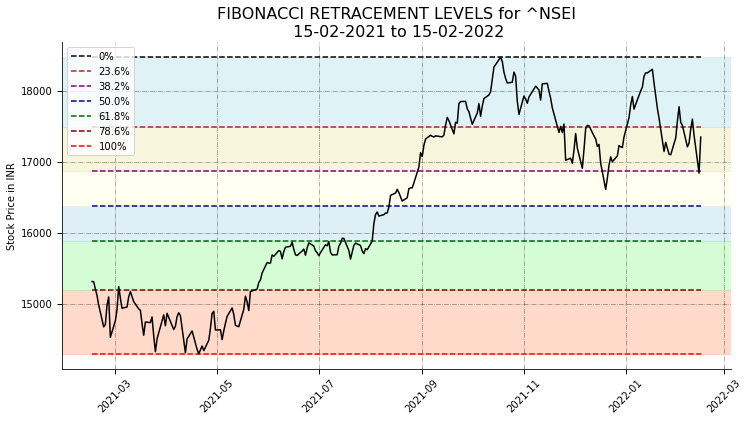

The Closing Price of ^NSEI is INR: 17352


        Price in INR
Levels              
0%             18477
23.6%          17490
38.2%          16880
50.0%          16386
61.8%          15893
78.6%          15191
100%           14296


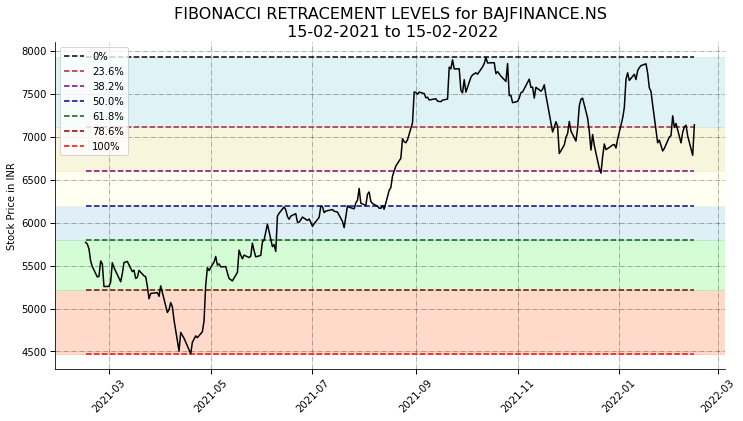

The Closing Price of BAJFINANCE.NS is INR: 7142


        Price in INR
Levels              
0%              7929
23.6%           7113
38.2%           6608
50.0%           6200
61.8%           5793
78.6%           5212
100%            4472


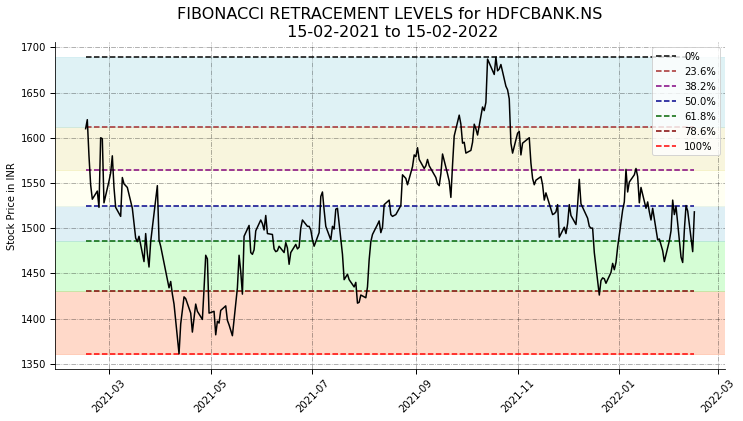

The Closing Price of HDFCBANK.NS is INR: 1518


        Price in INR
Levels              
0%              1689
23.6%           1612
38.2%           1564
50.0%           1525
61.8%           1486
78.6%           1431
100%            1361


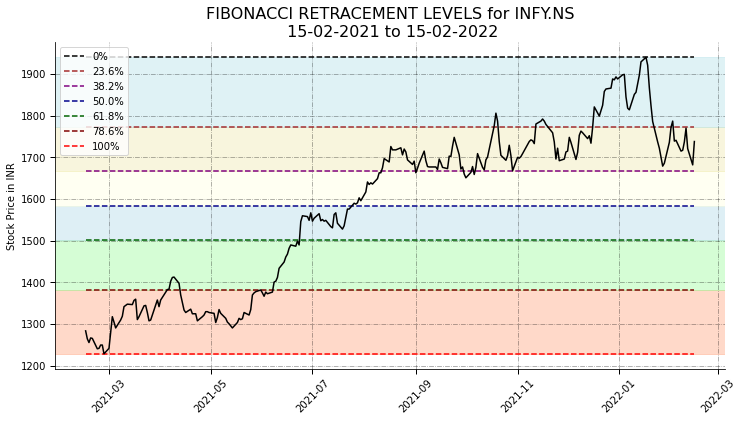

The Closing Price of INFY.NS is INR: 1738


        Price in INR
Levels              
0%              1940
23.6%           1772
38.2%           1668
50.0%           1584
61.8%           1501
78.6%           1381
100%            1229


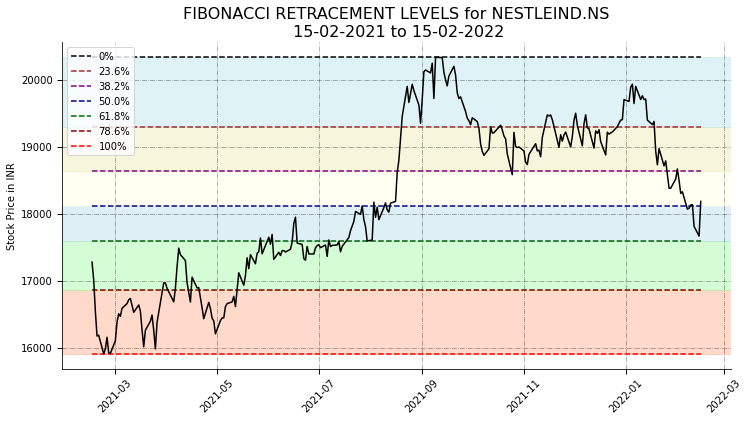

The Closing Price of NESTLEIND.NS is INR: 18187


        Price in INR
Levels              
0%             20337
23.6%          19293
38.2%          18648
50.0%          18126
61.8%          17604
78.6%          16861
100%           15915


In [23]:
for ticker in tickers:
    f_levels(ticker)

To analyse the retracement levels ascertained and how to use these levels for making decisions around the potential price movements, we visualise the price data in a Candlestick Chart for a shorter term, e.g., one quarter. This has been explained in the white paper on "Automatic identification and evaluation of Fibonacci retracements: Empirical evidence from three equity markets" by Prodromos Tsinaslanidis, Francisco Guijarro, and Nikolaos Voukelatos published in September 2021.

Further, candlestick charts have been explained well in this article link --> https://www.investopedia.com/trading/candlestick-charting-what-is-it/

For the purpose of this analysis, we build a Candlestick Chart for Bajaj Finance stock price over one quarter from 15-11-2021 to 15-02-2022.

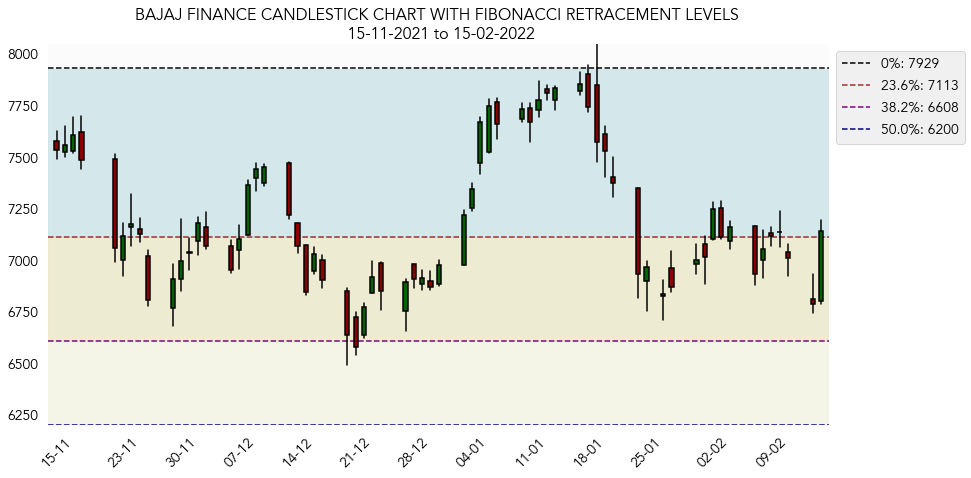

In [24]:
# build a candlestick chart for the last quarter interval of Bajaj Finance with Fibonacci levels applicable

# prepare Dataframe of Opening, High, Low and Closing prices for Bajaj Finance for the last quarterly interval
dataOneQuarter = pd.DataFrame(round(data['BAJFINANCE.NS Adj Close'].loc['2021-11-15':'2022-02-15']))
dataOneQuarter.rename(columns = {'BAJFINANCE.NS Adj Close' : 'Close'}, inplace = True)
dataOneQuarter['Open'] = round(data['BAJFINANCE.NS Open'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter['High'] = round(data['BAJFINANCE.NS High'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter['Low'] = round(data['BAJFINANCE.NS Low'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter.reset_index(inplace = True)

# count the number of days since start-date in the Dataframe
import datetime
base_date = dataOneQuarter['Date'][0]
dataOneQuarter['day_num'] = dataOneQuarter['Date'].map(lambda date:(date - base_date).days )

# define and plot the CandleStick Chart using MatPlotLib
import matplotlib as mpl

def draw_candlestick(axis, datapoints, color_up, color_down):

    # add colors to track if stock closed higher or lower than its opening price
    if datapoints['Close'] > datapoints['Open']:
        color = color_up
    else:
        color = color_down

    # plotting the candle wick
    axis.plot([datapoints['day_num'], datapoints['day_num']], [datapoints['Low'], datapoints['High']], linewidth = 1.5, color = 'black', solid_capstyle = 'round', zorder = 2)

    # drawing the candle body
    rect = mpl.patches.Rectangle((datapoints['day_num'] - 0.25, datapoints['Open']), 0.5, (datapoints['Close'] - datapoints['Open']), facecolor = color, edgecolor = 'black', linewidth = 1.5, zorder = 3)

    # adding candle body to axis
    axis.add_patch(rect)

    return axis

def draw_all_candlesticks(axis, datapoints, color_up, color_down):

    for day in range(datapoints.shape[0]):
        axis = draw_candlestick(axis, datapoints.iloc[day], color_up, color_down)

    return axis

# general plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 14

mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'

mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10

# create figure and axes
fig = plt.figure(figsize = (14, 7))
ax = fig.add_subplot(111)

# colors for candlesticks
colors = ['darkgreen', 'darkred']

# adding grid lines
#ax.grid(which = "major", color = 'k', linestyle = '-.', linewidth = 0.75)

# hardcoded levels (based on Fibonacci table for Bajaj Finance above)
levels_BJ = {"0%: 7929":7929, "23.6%: 7113":7113, "38.2%: 6608":6608, "50.0%: 6200":6200}
levelsKeys_BJ = list(levels_BJ.keys())
levelsValues_BJ = list(levels_BJ.values())

colors_BJ = ['black', 'brown', 'purple', 'darkblue']
for i in range(len(levelsKeys_BJ)):
    plt.hlines(levelsValues_BJ[i], xmin = -1, xmax = dataOneQuarter['day_num'].iloc[-1] + 1, label = levelsKeys_BJ[i], 
               linestyles = 'dashed', colors = colors_BJ[i])
plt.legend(bbox_to_anchor = (1, 1)) # keeping legend outside the chart

# charting candlesticks
ax = draw_all_candlesticks(ax, dataOneQuarter, colors[0], colors[1])

# set x_ticks to every 5th day
ax.set_xticks(list(dataOneQuarter['day_num'])[::5])
ax.set_xticklabels(list(dataOneQuarter['Date'].dt.strftime('%d-%m'))[::5])
plt.xticks(rotation = 45)

# set x_axis limits
ax.set_xlim(-1, dataOneQuarter['day_num'].iloc[-1] + 1)

# set y_axis limits
ax.set_ylim(levelsValues_BJ[3], dataOneQuarter['High'].max())

# colour the area in line with the Fibonacci Chart
plt.axhspan(levelsValues_BJ[2], levelsValues_BJ[3], alpha = 0.4, color = 'lightyellow')
plt.axhspan(levelsValues_BJ[1], levelsValues_BJ[2], alpha = 0.4, color = 'palegoldenrod')
plt.axhspan(levelsValues_BJ[0], levelsValues_BJ[1], alpha = 0.4, color = 'powderblue')
plt.axhspan(dataOneQuarter['High'].max(), levelsValues_BJ[0], alpha = 0.8, color = 'white')

plt.title('BAJAJ FINANCE CANDLESTICK CHART WITH FIBONACCI RETRACEMENT LEVELS \n 15-11-2021 to 15-02-2022', 
          fontsize = 16)
plt.show();

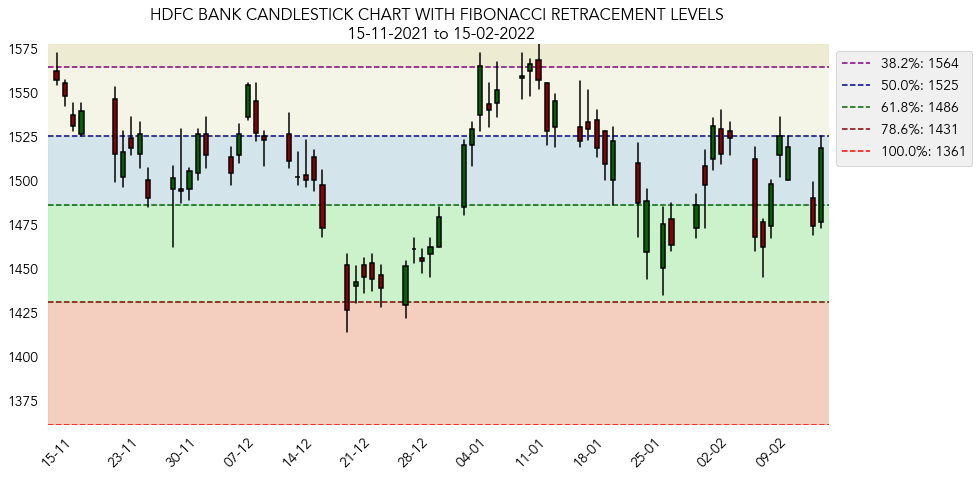

In [25]:
# build a candlestick chart for the last quarter interval of HDFC Bank with Fibonacci levels applicable

# prepare Dataframe of Opening, High, Low and Closing prices for HDFC Bank for the last quarterly interval
dataOneQuarter = pd.DataFrame(round(data['HDFCBANK.NS Adj Close'].loc['2021-11-15':'2022-02-15']))
dataOneQuarter.rename(columns = {'HDFCBANK.NS Adj Close' : 'Close'}, inplace = True)
dataOneQuarter['Open'] = round(data['HDFCBANK.NS Open'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter['High'] = round(data['HDFCBANK.NS High'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter['Low'] = round(data['HDFCBANK.NS Low'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter.reset_index(inplace = True)

# count the number of days since start-date in the Dataframe
import datetime
base_date = dataOneQuarter['Date'][0]
dataOneQuarter['day_num'] = dataOneQuarter['Date'].map(lambda date:(date - base_date).days )

# define and plot the CandleStick Chart using MatPlotLib
import matplotlib as mpl

def draw_candlestick(axis, datapoints, color_up, color_down):

    # add colors to track if stock closed higher or lower than its opening price
    if datapoints['Close'] > datapoints['Open']:
        color = color_up
    else:
        color = color_down

    # plotting the candle wick
    axis.plot([datapoints['day_num'], datapoints['day_num']], [datapoints['Low'], datapoints['High']], linewidth = 1.5, color = 'black', solid_capstyle = 'round', zorder = 2)

    # drawing the candle body
    rect = mpl.patches.Rectangle((datapoints['day_num'] - 0.25, datapoints['Open']), 0.5, (datapoints['Close'] - datapoints['Open']), facecolor = color, edgecolor = 'black', linewidth = 1.5, zorder = 3)

    # adding candle body to axis
    axis.add_patch(rect)

    return axis

def draw_all_candlesticks(axis, datapoints, color_up, color_down):

    for day in range(datapoints.shape[0]):
        axis = draw_candlestick(axis, datapoints.iloc[day], color_up, color_down)

    return axis

# general plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 14

mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'

mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10

# create figure and axes
fig = plt.figure(figsize = (14, 7))
ax = fig.add_subplot(111)

# colors for candlesticks
colors = ['darkgreen', 'darkred']

# adding grid lines
#ax.grid(which = "major", color = 'k', linestyle = '-.', linewidth = 0.75)

# hardcoded levels (based on Fibonacci table for HDFC Bank above)
levels_HB = {"38.2%: 1564":1564, "50.0%: 1525":1525, "61.8%: 1486":1486, 
             "78.6%: 1431":1431, "100.0%: 1361":1361 }
levelsKeys_HB = list(levels_HB.keys())
levelsValues_HB = list(levels_HB.values())

colors_HB = ['purple', 'darkblue', 'darkgreen', 'maroon', 'red']
for i in range(len(levelsKeys_HB)):
    plt.hlines(levelsValues_HB[i], xmin = -1, 
               xmax = dataOneQuarter['day_num'].iloc[-1] + 1, label = levelsKeys_HB[i], 
               linestyles = 'dashed', colors = colors_HB[i])
plt.legend(bbox_to_anchor = (1, 1)) # keeping legend outside the chart

# charting candlesticks
ax = draw_all_candlesticks(ax, dataOneQuarter, colors[0], colors[1])

# set x_ticks to every 5th day
ax.set_xticks(list(dataOneQuarter['day_num'])[::5])
ax.set_xticklabels(list(dataOneQuarter['Date'].dt.strftime('%d-%m'))[::5])
plt.xticks(rotation = 45)

# set x_axis limits
ax.set_xlim(-1, dataOneQuarter['day_num'].iloc[-1] + 1)

# set y_axis limits
ax.set_ylim(levelsValues_HB[4], dataOneQuarter['High'].max())

# colour the area in line with the Fibonacci Chart
plt.axhspan(levelsValues_HB[3], levelsValues_HB[4], alpha = 0.4, color = 'lightsalmon')
plt.axhspan(levelsValues_HB[2], levelsValues_HB[3], alpha = 0.4, color = 'palegreen')
plt.axhspan(levelsValues_HB[1], levelsValues_HB[2], alpha = 0.4, color = 'lightblue')
plt.axhspan(levelsValues_HB[0], levelsValues_HB[1], alpha = 0.4, color = 'lightyellow')
plt.axhspan(dataOneQuarter['High'].max(), levelsValues_HB[0], alpha = 0.4, color = 'palegoldenrod')

plt.title('HDFC BANK CANDLESTICK CHART WITH FIBONACCI RETRACEMENT LEVELS \n 15-11-2021 to 15-02-2022', 
          fontsize = 16)
plt.show();

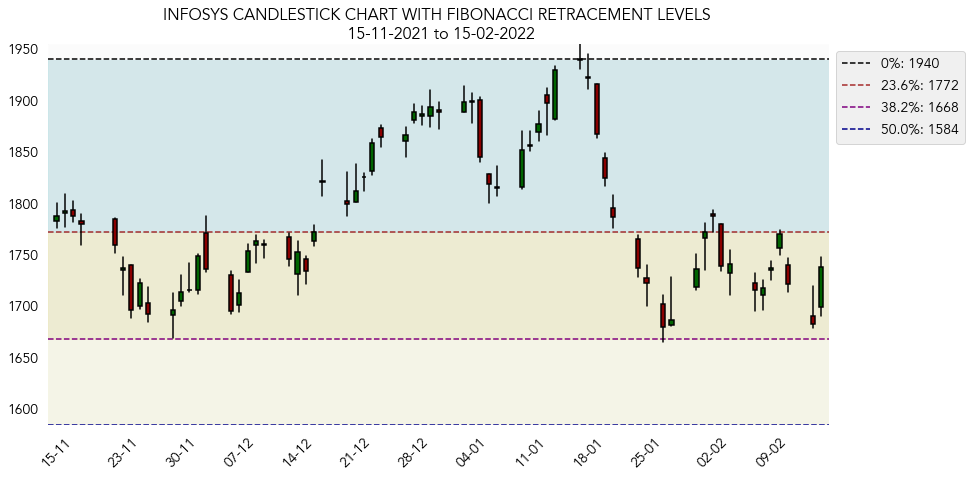

In [26]:
# build a candlestick chart for the last quarter interval of Infosys with Fibonacci levels applicable

# prepare Dataframe of Opening, High, Low and Closing prices for Infosys for the last quarterly interval
dataOneQuarter = pd.DataFrame(round(data['INFY.NS Adj Close'].loc['2021-11-15':'2022-02-15']))
dataOneQuarter.rename(columns = {'INFY.NS Adj Close' : 'Close'}, inplace = True)
dataOneQuarter['Open'] = round(data['INFY.NS Open'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter['High'] = round(data['INFY.NS High'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter['Low'] = round(data['INFY.NS Low'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter.reset_index(inplace = True)

# count the number of days since start-date in the Dataframe
import datetime
base_date = dataOneQuarter['Date'][0]
dataOneQuarter['day_num'] = dataOneQuarter['Date'].map(lambda date:(date - base_date).days )

# define and plot the CandleStick Chart using MatPlotLib
import matplotlib as mpl

def draw_candlestick(axis, datapoints, color_up, color_down):

    # add colors to track if stock closed higher or lower than its opening price
    if datapoints['Close'] > datapoints['Open']:
        color = color_up
    else:
        color = color_down

    # plotting the candle wick
    axis.plot([datapoints['day_num'], datapoints['day_num']], [datapoints['Low'], datapoints['High']], linewidth = 1.5, color = 'black', solid_capstyle = 'round', zorder = 2)

    # drawing the candle body
    rect = mpl.patches.Rectangle((datapoints['day_num'] - 0.25, datapoints['Open']), 0.5, (datapoints['Close'] - datapoints['Open']), facecolor = color, edgecolor = 'black', linewidth = 1.5, zorder = 3)

    # adding candle body to axis
    axis.add_patch(rect)

    return axis

def draw_all_candlesticks(axis, datapoints, color_up, color_down):

    for day in range(datapoints.shape[0]):
        axis = draw_candlestick(axis, datapoints.iloc[day], color_up, color_down)

    return axis

# general plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 14

mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'

mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10

# create figure and axes
fig = plt.figure(figsize = (14, 7))
ax = fig.add_subplot(111)

# colors for candlesticks
colors = ['darkgreen', 'darkred']

# adding grid lines
#ax.grid(which = "major", color = 'k', linestyle = '-.', linewidth = 0.75)

# hardcoded levels (based on Fibonacci table for Infosys above)
levels_I = {"0%: 1940":1940, "23.6%: 1772":1772, "38.2%: 1668":1668, "50.0%: 1584":1584}
levelsKeys_I = list(levels_I.keys())
levelsValues_I = list(levels_I.values())

colors_I = ['black', 'brown', 'purple', 'darkblue']
for i in range(len(levelsKeys_I)):
    plt.hlines(levelsValues_I[i], xmin = -1, xmax = dataOneQuarter['day_num'].iloc[-1] + 1, label = levelsKeys_I[i], 
               linestyles = 'dashed', colors = colors_I[i])
plt.legend(bbox_to_anchor = (1, 1)) # keeping legend outside the chart

# charting candlesticks
ax = draw_all_candlesticks(ax, dataOneQuarter, colors[0], colors[1])

# set x_ticks to every 5th day
ax.set_xticks(list(dataOneQuarter['day_num'])[::5])
ax.set_xticklabels(list(dataOneQuarter['Date'].dt.strftime('%d-%m'))[::5])
plt.xticks(rotation = 45)

# set x_axis limits
ax.set_xlim(-1, dataOneQuarter['day_num'].iloc[-1] + 1)

# set y_axis limits
ax.set_ylim(levelsValues_I[3], dataOneQuarter['High'].max())

# colour the area in line with the Fibonacci Chart
plt.axhspan(levelsValues_I[2], levelsValues_I[3], alpha = 0.4, color = 'lightyellow')
plt.axhspan(levelsValues_I[1], levelsValues_I[2], alpha = 0.4, color = 'palegoldenrod')
plt.axhspan(levelsValues_I[0], levelsValues_I[1], alpha = 0.4, color = 'powderblue')
plt.axhspan(dataOneQuarter['High'].max(), levelsValues_I[0], alpha = 0.8, color = 'white')

plt.title('INFOSYS CANDLESTICK CHART WITH FIBONACCI RETRACEMENT LEVELS \n 15-11-2021 to 15-02-2022', 
          fontsize = 16)
plt.show();

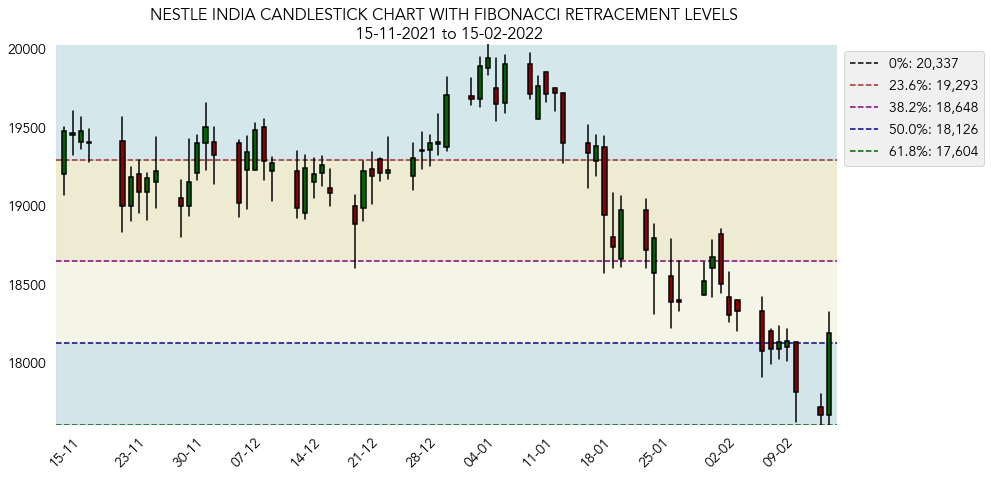

In [27]:
# build a candlestick chart for the last quarter interval of Nestle India with Fibonacci levels applicable

# prepare Dataframe of Opening, High, Low and Closing prices for Nestle India for the last quarterly interval
dataOneQuarter = pd.DataFrame(round(data['NESTLEIND.NS Adj Close'].loc['2021-11-15':'2022-02-15']))
dataOneQuarter.rename(columns = {'NESTLEIND.NS Adj Close' : 'Close'}, inplace = True)
dataOneQuarter['Open'] = round(data['NESTLEIND.NS Open'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter['High'] = round(data['NESTLEIND.NS High'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter['Low'] = round(data['NESTLEIND.NS Low'].loc['2021-11-15':'2022-02-15'])
dataOneQuarter.reset_index(inplace = True)

# count the number of days since start-date in the Dataframe
import datetime
base_date = dataOneQuarter['Date'][0]
dataOneQuarter['day_num'] = dataOneQuarter['Date'].map(lambda date:(date - base_date).days )

# define and plot the CandleStick Chart using MatPlotLib
import matplotlib as mpl

def draw_candlestick(axis, datapoints, color_up, color_down):

    # add colors to track if stock closed higher or lower than its opening price
    if datapoints['Close'] > datapoints['Open']:
        color = color_up
    else:
        color = color_down

    # plotting the candle wick
    axis.plot([datapoints['day_num'], datapoints['day_num']], [datapoints['Low'], datapoints['High']], linewidth = 1.5, color = 'black', solid_capstyle = 'round', zorder = 2)

    # drawing the candle body
    rect = mpl.patches.Rectangle((datapoints['day_num'] - 0.25, datapoints['Open']), 0.5, (datapoints['Close'] - datapoints['Open']), facecolor = color, edgecolor = 'black', linewidth = 1.5, zorder = 3)

    # adding candle body to axis
    axis.add_patch(rect)

    return axis

def draw_all_candlesticks(axis, datapoints, color_up, color_down):

    for day in range(datapoints.shape[0]):
        axis = draw_candlestick(axis, datapoints.iloc[day], color_up, color_down)

    return axis

# general plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 14

mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'

mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10

# create figure and axes
fig = plt.figure(figsize = (14, 7))
ax = fig.add_subplot(111)

# colors for candlesticks
colors = ['darkgreen', 'darkred']

# adding grid lines
#ax.grid(which = "major", color = 'k', linestyle = '-.', linewidth = 0.75)

# hardcoded levels (based on Fibonacci table for Nestle India above)
levels_NI = {"0%: 20,337":20337, "23.6%: 19,293":19293, "38.2%: 18,648":18648, 
             "50.0%: 18,126":18126, "61.8%: 17,604":17604 }
levelsKeys_NI = list(levels_NI.keys())
levelsValues_NI = list(levels_NI.values())

colors_NI = ['black', 'brown', 'purple', 'darkblue', 'darkgreen']
for i in range(len(levelsKeys_NI)):
    plt.hlines(levelsValues_NI[i], xmin = -1, 
               xmax = dataOneQuarter['day_num'].iloc[-1] + 1, 
               label = levelsKeys_NI[i], 
               linestyles = 'dashed', colors = colors_NI[i])
plt.legend(bbox_to_anchor = (1, 1)) # keeping legend outside the chart

# charting candlesticks
ax = draw_all_candlesticks(ax, dataOneQuarter, colors[0], colors[1])

# set x_ticks to every 5th day
ax.set_xticks(list(dataOneQuarter['day_num'])[::5])
ax.set_xticklabels(list(dataOneQuarter['Date'].dt.strftime('%d-%m'))[::5])
plt.xticks(rotation = 45)

# set x_axis limits
ax.set_xlim(-1, dataOneQuarter['day_num'].iloc[-1] + 1)

# set y_axis limits
ax.set_ylim(levelsValues_NI[4], dataOneQuarter['High'].max() )

# colour the area in line with the Fibonacci Chart
plt.axhspan(levelsValues_NI[3], levelsValues_NI[4], alpha = 0.4, color = 'lightblue')
plt.axhspan(levelsValues_NI[2], levelsValues_NI[3], alpha = 0.4, color = 'lightyellow')
plt.axhspan(levelsValues_NI[1], levelsValues_NI[2], alpha = 0.4, color = 'palegoldenrod')
plt.axhspan(levelsValues_NI[0], levelsValues_NI[1], alpha = 0.4, color = 'powderblue')
plt.axhspan(dataOneQuarter['High'].max(), levelsValues_NI[0], alpha = 0.8, color = 'white')

plt.title('NESTLE INDIA CANDLESTICK CHART WITH FIBONACCI RETRACEMENT LEVELS \n 15-11-2021 to 15-02-2022', 
          fontsize = 16)
plt.show();